In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes);


In [68]:
f_0 = 18e3#77.7*1e9 # 77.7GHz
phi_t = 0
phi_r = 0
A_t = 1
A_r = 1
f_ramp = 2#425*1e6 #Hz
T_ramp = 0.010
m_w = f_ramp/T_ramp
c = 343

In [69]:
def f_t(t):
    return f_0 + m_w*(t % T_ramp)

In [70]:
def u_t(t):
    f_t_ = f_t(t)
    return A_t*np.cos(2*np.pi*f_t_*t + phi_t)

In [71]:
r = 10 # 100m distance
def f_r(t):
    return f_0 + m_w*(t % T_ramp - 2*r/c)

In [72]:
def u_r(t):
    f_r_ = f_r(t)
    return A_r*np.cos(2*np.pi*f_r_*t + phi_r)

In [73]:
#t = np.arange(0, 2*T_ramp, 1e-8)
#t = np.linspace(0, 2*T_ramp,2000000) #as sstated in the doc
t = np.linspace(0, 2*T_ramp,88200)
sr = t.shape[0]/(2*T_ramp)

(17000.0, 18500.0)

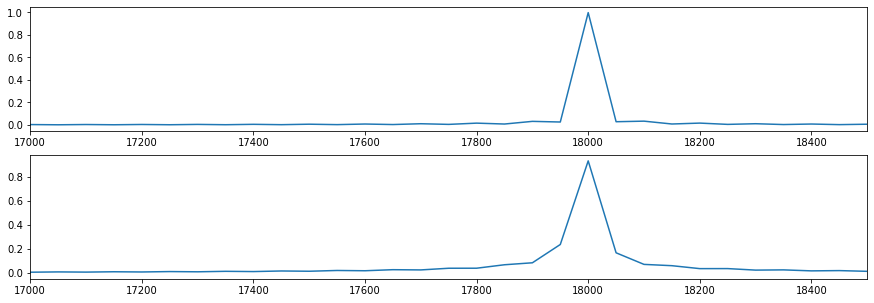

In [74]:
fig, ax = plt.subplots(2,1, figsize=(15,5))
F_u_t, A_u_t = compute_fft(u_t(t), sr, n = None, scale_amplitudes = True)
ax[0].plot(F_u_t, A_u_t)
ax[0].set_xlim(17e3,18.5e3)
F_u_r, A_u_r = compute_fft(u_r(t), sr, n = None, scale_amplitudes = True)
ax[1].plot(F_u_r, A_u_r)
ax[1].set_xlim(17e3,18.5e3)

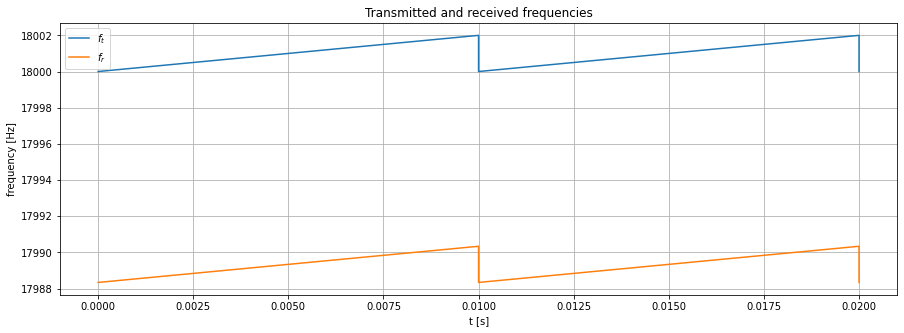

In [75]:
plt.figure(figsize=(15,5))
plt.plot(t, f_t(t), label="$f_t$")
plt.plot(t, f_r(t), label="$f_r$")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("frequency [Hz]")
plt.title("Transmitted and received frequencies")
plt.grid();

D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


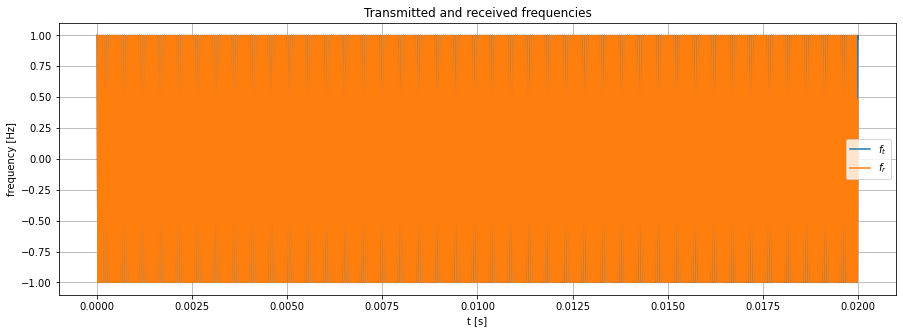

In [8]:
fig, ax = plt.subplots(2,1, figsize=(15,5))

ax[0].plot(t, u_t(t), label="$f_t$")
ax[1].plot(t, u_r(t), label="$f_r$")
ax[0].xlabel("t [s]")
ax
plt.ylabel("frequency [Hz]")
plt.title("Transmitted and received frequencies")
plt.grid();

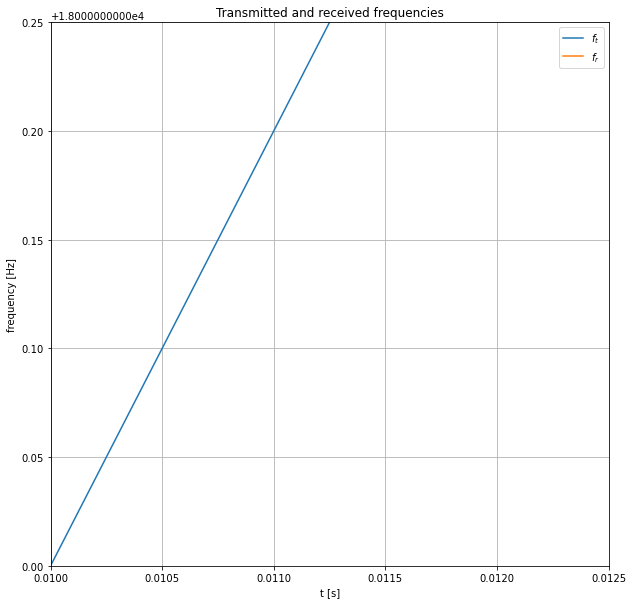

In [74]:
# lets observe the received signal too becuase its not visible above
t_op = T_ramp
plt.figure(figsize=(10,10))
plt.plot(t, f_t(t), label="$f_t$")
plt.plot(t, f_r(t), label="$f_r$")
plt.legend()
#plt.xlim([t_op-T_ramp/100000, t_op+T_ramp/100000])
#plt.ylim([f_0-100e1, f_0+100e1])
plt.ylim([0.00+1.8e4, 0.25+1.8e4])
plt.xlim([0.0100, 0.0125])
plt.xlabel("t [s]")
plt.ylabel("frequency [Hz]")
plt.title("Transmitted and received frequencies")
plt.grid();